In [ ]:
#Packages
import anndata

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import re
import os
import time

#Import code
import encoder_decoder_builder_batch
import mask_builder
import model
import training_pVAE

In [2]:
#Create Folder for ANN_data
anndata_loc='/cluster/work/grlab/projects/projects2020-autoencoder_pathway/gamma_VAE/kang_2018/kang_count.h5ad'
adata=anndata.read_h5ad(anndata_loc)

In [4]:
geneSets=[]
for i in range(adata.varm["I"].shape[1]):
    geneSets.append(np.where(adata.varm["I"][:,i]==1)[0])

In [5]:
auxillary_nodes=1
for i in range(auxillary_nodes):
    geneSets.append(np.arange(adata.X.shape[1]))

In [6]:
#Train/test split
FPKM_train,FPKM_test=train_test_split(adata.X, shuffle=True,test_size=0.25)
FPKM_test.shape

(3394, 979)

In [8]:
hidden_layers=[12]
mask_encoder,mask_decoder=mask_builder.mask_builder(input_dim=FPKM_test.shape[1],
                                                   hidden_layers=hidden_layers,
                                                   geneSets=geneSets
                                                   ,p_p_latent_dim=4)

decoder_1,decoder_2=encoder_decoder_builder_batch.decoder_builder(mask_decoder=mask_decoder,kernel_initializer="he_uniform"
                    ,bias_initializer="zero",use_bias=True,activation="elu",bias_last_layer=False)

encoder=encoder_decoder_builder_batch.encoder_builder(mask_encoder=mask_encoder,kernel_initializer="he_uniform"
                    ,bias_initializer="zero",use_bias=True,activation="elu")
vae_two_layer = model.VAE(encoder=encoder,decoder_1=decoder_1,decoder_2=decoder_2,dim=[FPKM_test.shape[1],len(geneSets)])
history,model_two = training_pVAE.train_VAE(training_data=FPKM_train,validation_data=FPKM_test,geneSets=geneSets,hidden=hidden_layers[0],
                                                                  batch_size=256,num_epochs=1200,loss_function="aux_vae",
                                                                  model=vae_two_layer,beta=1e-056,drop_rate=0.0,
                                                                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                                                      verbose=True,auxillary_nodes=auxillary_nodes,weight_global=0.5,full_loss=False)

76.54445558413863
Epoch[1/1200], Step[40/39],Loss: 0.2028, Reconstruction loss: 0.2027, KL div:4.88808441,val_loss:0.2113,beta:0.0000
4.729765383061022
Epoch[2/1200], Step[40/39],Loss: 0.1625, Reconstruction loss: 0.1620, KL div:50.38021851,val_loss:0.1707,beta:0.0000
4.830038377083838
Epoch[3/1200], Step[40/39],Loss: 0.1463, Reconstruction loss: 0.1450, KL div:123.47370911,val_loss:0.1507,beta:0.0000
4.752879075240344
Epoch[4/1200], Step[40/39],Loss: 0.1330, Reconstruction loss: 0.1307, KL div:228.83322144,val_loss:0.1378,beta:0.0000
4.751253272872418
Epoch[5/1200], Step[40/39],Loss: 0.1282, Reconstruction loss: 0.1249, KL div:325.12445068,val_loss:0.1304,beta:0.0000
4.707877699285746
Epoch[6/1200], Step[40/39],Loss: 0.1201, Reconstruction loss: 0.1163, KL div:378.03610229,val_loss:0.1253,beta:0.0000
4.788036779966205
Epoch[7/1200], Step[40/39],Loss: 0.1220, Reconstruction loss: 0.1176, KL div:433.33831787,val_loss:0.1215,beta:0.0000
4.8141014110296965
Epoch[8/1200], Step[40/39],Loss:

4.709502030164003
Epoch[61/1200], Step[40/39],Loss: 0.0713, Reconstruction loss: 0.0640, KL div:729.97326660,val_loss:0.0738,beta:0.0000
4.76687808893621
Epoch[62/1200], Step[40/39],Loss: 0.0760, Reconstruction loss: 0.0685, KL div:753.17620850,val_loss:0.0736,beta:0.0000
4.737865887116641
Epoch[63/1200], Step[40/39],Loss: 0.0715, Reconstruction loss: 0.0641, KL div:736.18634033,val_loss:0.0734,beta:0.0000
4.7113139890134335
Epoch[64/1200], Step[40/39],Loss: 0.0705, Reconstruction loss: 0.0631, KL div:739.11700439,val_loss:0.0731,beta:0.0000
4.744077946059406
Epoch[65/1200], Step[40/39],Loss: 0.0726, Reconstruction loss: 0.0652, KL div:738.03234863,val_loss:0.0729,beta:0.0000
4.736809229012579
Epoch[66/1200], Step[40/39],Loss: 0.0736, Reconstruction loss: 0.0661, KL div:747.78735352,val_loss:0.0727,beta:0.0000
4.7315731309354305
Epoch[67/1200], Step[40/39],Loss: 0.0707, Reconstruction loss: 0.0633, KL div:735.26751709,val_loss:0.0725,beta:0.0000
4.699281812179834
Epoch[68/1200], Step[4

4.730112100020051
Epoch[121/1200], Step[40/39],Loss: 0.0624, Reconstruction loss: 0.0549, KL div:758.75286865,val_loss:0.0648,beta:0.0000
4.710952649824321
Epoch[122/1200], Step[40/39],Loss: 0.0632, Reconstruction loss: 0.0556, KL div:759.76086426,val_loss:0.0647,beta:0.0000
4.676326230168343
Epoch[123/1200], Step[40/39],Loss: 0.0608, Reconstruction loss: 0.0532, KL div:758.79498291,val_loss:0.0647,beta:0.0000
4.697932036127895
Epoch[124/1200], Step[40/39],Loss: 0.0613, Reconstruction loss: 0.0538, KL div:756.72436523,val_loss:0.0646,beta:0.0000
4.730398648884147
Epoch[125/1200], Step[40/39],Loss: 0.0637, Reconstruction loss: 0.0560, KL div:764.89739990,val_loss:0.0645,beta:0.0000
4.678232832811773
Epoch[126/1200], Step[40/39],Loss: 0.0631, Reconstruction loss: 0.0556, KL div:758.19696045,val_loss:0.0645,beta:0.0000
4.711570997722447
Epoch[127/1200], Step[40/39],Loss: 0.0600, Reconstruction loss: 0.0525, KL div:749.32891846,val_loss:0.0644,beta:0.0000
4.748885164968669
Epoch[128/1200],

4.694147828966379
Epoch[181/1200], Step[40/39],Loss: 0.0614, Reconstruction loss: 0.0536, KL div:771.05200195,val_loss:0.0615,beta:0.0000
4.713650758843869
Epoch[182/1200], Step[40/39],Loss: 0.0617, Reconstruction loss: 0.0539, KL div:777.26025391,val_loss:0.0614,beta:0.0000
4.688565755728632
Epoch[183/1200], Step[40/39],Loss: 0.0595, Reconstruction loss: 0.0519, KL div:765.54742432,val_loss:0.0614,beta:0.0000
4.718835536856204
Epoch[184/1200], Step[40/39],Loss: 0.0605, Reconstruction loss: 0.0528, KL div:772.79290771,val_loss:0.0613,beta:0.0000
4.7281039990484715
Epoch[185/1200], Step[40/39],Loss: 0.0581, Reconstruction loss: 0.0505, KL div:761.11322021,val_loss:0.0614,beta:0.0000
4.7347176182083786
Epoch[186/1200], Step[40/39],Loss: 0.0607, Reconstruction loss: 0.0530, KL div:770.69171143,val_loss:0.0613,beta:0.0000
4.726992033421993
Epoch[187/1200], Step[40/39],Loss: 0.0584, Reconstruction loss: 0.0508, KL div:764.37841797,val_loss:0.0613,beta:0.0000
4.724835861008614
Epoch[188/1200

4.719804877880961
Epoch[241/1200], Step[40/39],Loss: 0.0589, Reconstruction loss: 0.0513, KL div:761.28149414,val_loss:0.0632,beta:0.0000
4.690268320031464
Epoch[242/1200], Step[40/39],Loss: 0.0595, Reconstruction loss: 0.0517, KL div:774.44427490,val_loss:0.0608,beta:0.0000
4.739072278141975
Epoch[243/1200], Step[40/39],Loss: 0.0583, Reconstruction loss: 0.0507, KL div:765.97674561,val_loss:0.0617,beta:0.0000
4.736655783839524
Epoch[244/1200], Step[40/39],Loss: 0.0584, Reconstruction loss: 0.0507, KL div:766.07470703,val_loss:0.0624,beta:0.0000
4.7318495898507535
Epoch[245/1200], Step[40/39],Loss: 0.0623, Reconstruction loss: 0.0543, KL div:794.23889160,val_loss:0.0597,beta:0.0000
4.7492352947592735
Epoch[246/1200], Step[40/39],Loss: 0.0576, Reconstruction loss: 0.0500, KL div:759.12115479,val_loss:0.0597,beta:0.0000
4.695590941701084
Epoch[247/1200], Step[40/39],Loss: 0.0552, Reconstruction loss: 0.0477, KL div:753.59814453,val_loss:0.0634,beta:0.0000
4.717554248869419
Epoch[248/1200

4.745456779841334
Epoch[301/1200], Step[40/39],Loss: 0.0556, Reconstruction loss: 0.0480, KL div:766.96472168,val_loss:0.0603,beta:0.0000
4.694384629838169
Epoch[302/1200], Step[40/39],Loss: 0.0560, Reconstruction loss: 0.0484, KL div:765.33544922,val_loss:0.0629,beta:0.0000
4.794026055838913
Epoch[303/1200], Step[40/39],Loss: 0.0530, Reconstruction loss: 0.0456, KL div:740.49700928,val_loss:0.0587,beta:0.0000
4.704168854281306
Epoch[304/1200], Step[40/39],Loss: 0.0568, Reconstruction loss: 0.0491, KL div:764.91644287,val_loss:0.0587,beta:0.0000
4.619036229327321
Epoch[305/1200], Step[40/39],Loss: 0.0568, Reconstruction loss: 0.0491, KL div:769.61053467,val_loss:0.0597,beta:0.0000
4.727557839360088
Epoch[306/1200], Step[40/39],Loss: 0.0563, Reconstruction loss: 0.0487, KL div:761.17370605,val_loss:0.0586,beta:0.0000
4.718100560829043
Epoch[307/1200], Step[40/39],Loss: 0.0583, Reconstruction loss: 0.0505, KL div:780.59515381,val_loss:0.0590,beta:0.0000
4.687232600990683
Epoch[308/1200],

4.745355647988617
Epoch[361/1200], Step[40/39],Loss: 0.0565, Reconstruction loss: 0.0488, KL div:766.85937500,val_loss:0.0592,beta:0.0000
4.718467171303928
Epoch[362/1200], Step[40/39],Loss: 0.0584, Reconstruction loss: 0.0505, KL div:786.44323730,val_loss:0.0579,beta:0.0000
4.758531398605555
Epoch[363/1200], Step[40/39],Loss: 0.0543, Reconstruction loss: 0.0466, KL div:762.50610352,val_loss:0.0602,beta:0.0000
4.808466891758144
Epoch[364/1200], Step[40/39],Loss: 0.0522, Reconstruction loss: 0.0447, KL div:749.74902344,val_loss:0.0584,beta:0.0000
4.783575634006411
Epoch[365/1200], Step[40/39],Loss: 0.0543, Reconstruction loss: 0.0467, KL div:758.32250977,val_loss:0.0579,beta:0.0000
4.770683262031525
Epoch[366/1200], Step[40/39],Loss: 0.0588, Reconstruction loss: 0.0510, KL div:783.28479004,val_loss:0.0580,beta:0.0000
4.743719549849629
Epoch[367/1200], Step[40/39],Loss: 0.0551, Reconstruction loss: 0.0475, KL div:761.16711426,val_loss:0.0580,beta:0.0000
4.806226383894682
Epoch[368/1200],

4.768727403134108
Epoch[421/1200], Step[40/39],Loss: 0.0575, Reconstruction loss: 0.0497, KL div:776.26623535,val_loss:0.0575,beta:0.0000
4.740227737929672
Epoch[422/1200], Step[40/39],Loss: 0.0552, Reconstruction loss: 0.0475, KL div:768.43426514,val_loss:0.0574,beta:0.0000
4.789802904240787
Epoch[423/1200], Step[40/39],Loss: 0.0537, Reconstruction loss: 0.0461, KL div:763.76464844,val_loss:0.0576,beta:0.0000
4.756020102649927
Epoch[424/1200], Step[40/39],Loss: 0.0583, Reconstruction loss: 0.0504, KL div:783.95288086,val_loss:0.0574,beta:0.0000
4.7500444911420345
Epoch[425/1200], Step[40/39],Loss: 0.0566, Reconstruction loss: 0.0489, KL div:772.71899414,val_loss:0.0575,beta:0.0000
4.805661717895418
Epoch[426/1200], Step[40/39],Loss: 0.0527, Reconstruction loss: 0.0452, KL div:753.69482422,val_loss:0.0574,beta:0.0000
4.77341395104304
Epoch[427/1200], Step[40/39],Loss: 0.0562, Reconstruction loss: 0.0485, KL div:771.47619629,val_loss:0.0574,beta:0.0000
4.753594309091568
Epoch[428/1200],

4.73194339312613
Epoch[481/1200], Step[40/39],Loss: 0.0576, Reconstruction loss: 0.0498, KL div:785.11163330,val_loss:0.0569,beta:0.0000
4.759941271971911
Epoch[482/1200], Step[40/39],Loss: 0.0523, Reconstruction loss: 0.0448, KL div:751.97009277,val_loss:0.0569,beta:0.0000
4.750899982172996
Epoch[483/1200], Step[40/39],Loss: 0.0549, Reconstruction loss: 0.0472, KL div:774.29498291,val_loss:0.0572,beta:0.0000
4.760562191251665
Epoch[484/1200], Step[40/39],Loss: 0.0532, Reconstruction loss: 0.0456, KL div:763.87860107,val_loss:0.0569,beta:0.0000
4.768643507733941
Epoch[485/1200], Step[40/39],Loss: 0.0568, Reconstruction loss: 0.0489, KL div:789.77838135,val_loss:0.0574,beta:0.0000
4.769028623122722
Epoch[486/1200], Step[40/39],Loss: 0.0513, Reconstruction loss: 0.0438, KL div:748.85461426,val_loss:0.0569,beta:0.0000
4.731592698954046
Epoch[487/1200], Step[40/39],Loss: 0.0568, Reconstruction loss: 0.0489, KL div:786.13867188,val_loss:0.0569,beta:0.0000
4.740722341928631
Epoch[488/1200], 

4.776847253087908
Epoch[541/1200], Step[40/39],Loss: 0.0547, Reconstruction loss: 0.0469, KL div:780.10540771,val_loss:0.0565,beta:0.0000
4.808128879405558
Epoch[542/1200], Step[40/39],Loss: 0.0555, Reconstruction loss: 0.0476, KL div:786.65307617,val_loss:0.0565,beta:0.0000
4.7490043099969625
Epoch[543/1200], Step[40/39],Loss: 0.0548, Reconstruction loss: 0.0471, KL div:770.81512451,val_loss:0.0567,beta:0.0000
4.767891746945679
Epoch[544/1200], Step[40/39],Loss: 0.0541, Reconstruction loss: 0.0463, KL div:777.88909912,val_loss:0.0565,beta:0.0000
4.754999015945941
Epoch[545/1200], Step[40/39],Loss: 0.0540, Reconstruction loss: 0.0462, KL div:777.95526123,val_loss:0.0564,beta:0.0000
4.829627232160419
Epoch[546/1200], Step[40/39],Loss: 0.0519, Reconstruction loss: 0.0443, KL div:759.99700928,val_loss:0.0565,beta:0.0000
4.7228491310961545
Epoch[547/1200], Step[40/39],Loss: 0.0562, Reconstruction loss: 0.0484, KL div:783.13494873,val_loss:0.0565,beta:0.0000
4.763913344126195
Epoch[548/1200

4.815729476045817
Epoch[601/1200], Step[40/39],Loss: 0.0518, Reconstruction loss: 0.0442, KL div:759.29370117,val_loss:0.0564,beta:0.0000
4.812029314227402
Epoch[602/1200], Step[40/39],Loss: 0.0541, Reconstruction loss: 0.0464, KL div:771.15270996,val_loss:0.0562,beta:0.0000
4.7625266732648015
Epoch[603/1200], Step[40/39],Loss: 0.0588, Reconstruction loss: 0.0508, KL div:803.00482178,val_loss:0.0563,beta:0.0000
4.7910470720380545
Epoch[604/1200], Step[40/39],Loss: 0.0563, Reconstruction loss: 0.0485, KL div:779.33746338,val_loss:0.0562,beta:0.0000
4.7862706133164465
Epoch[605/1200], Step[40/39],Loss: 0.0530, Reconstruction loss: 0.0454, KL div:766.37347412,val_loss:0.0564,beta:0.0000
4.794211488217115
Epoch[606/1200], Step[40/39],Loss: 0.0534, Reconstruction loss: 0.0456, KL div:772.34509277,val_loss:0.0563,beta:0.0000
4.737804514821619
Epoch[607/1200], Step[40/39],Loss: 0.0573, Reconstruction loss: 0.0493, KL div:796.04211426,val_loss:0.0562,beta:0.0000
4.8256537318229675
Epoch[608/12

4.710774027276784
Epoch[661/1200], Step[40/39],Loss: 0.0530, Reconstruction loss: 0.0454, KL div:767.60931396,val_loss:0.0561,beta:0.0000
4.769865763839334
Epoch[662/1200], Step[40/39],Loss: 0.0539, Reconstruction loss: 0.0462, KL div:773.76531982,val_loss:0.0560,beta:0.0000
4.768686363939196
Epoch[663/1200], Step[40/39],Loss: 0.0518, Reconstruction loss: 0.0442, KL div:761.21716309,val_loss:0.0560,beta:0.0000
4.7508408087305725
Epoch[664/1200], Step[40/39],Loss: 0.0531, Reconstruction loss: 0.0454, KL div:764.52856445,val_loss:0.0561,beta:0.0000
4.7382265301421285
Epoch[665/1200], Step[40/39],Loss: 0.0557, Reconstruction loss: 0.0478, KL div:790.49572754,val_loss:0.0560,beta:0.0000
4.705035003833473
Epoch[666/1200], Step[40/39],Loss: 0.0516, Reconstruction loss: 0.0441, KL div:752.99188232,val_loss:0.0561,beta:0.0000
4.708411285188049
Epoch[667/1200], Step[40/39],Loss: 0.0527, Reconstruction loss: 0.0450, KL div:761.65063477,val_loss:0.0560,beta:0.0000
4.711955149192363
Epoch[668/1200

4.737544781994075
Epoch[721/1200], Step[40/39],Loss: 0.0552, Reconstruction loss: 0.0474, KL div:782.00244141,val_loss:0.0558,beta:0.0000
4.6966833849437535
Epoch[722/1200], Step[40/39],Loss: 0.0532, Reconstruction loss: 0.0455, KL div:773.78778076,val_loss:0.0559,beta:0.0000
4.719810917973518
Epoch[723/1200], Step[40/39],Loss: 0.0507, Reconstruction loss: 0.0432, KL div:747.69171143,val_loss:0.0558,beta:0.0000
4.717302476987243
Epoch[724/1200], Step[40/39],Loss: 0.0542, Reconstruction loss: 0.0467, KL div:758.68914795,val_loss:0.0559,beta:0.0000
4.776690952945501
Epoch[725/1200], Step[40/39],Loss: 0.0554, Reconstruction loss: 0.0476, KL div:773.61816406,val_loss:0.0558,beta:0.0000
4.747930940240622
Epoch[726/1200], Step[40/39],Loss: 0.0525, Reconstruction loss: 0.0448, KL div:763.35693359,val_loss:0.0558,beta:0.0000
4.7261283048428595
Epoch[727/1200], Step[40/39],Loss: 0.0556, Reconstruction loss: 0.0477, KL div:786.15594482,val_loss:0.0562,beta:0.0000
4.676151541061699
Epoch[728/1200

4.717773473355919
Epoch[781/1200], Step[40/39],Loss: 0.0544, Reconstruction loss: 0.0467, KL div:770.19189453,val_loss:0.0556,beta:0.0000
4.682220341172069
Epoch[782/1200], Step[40/39],Loss: 0.0537, Reconstruction loss: 0.0459, KL div:778.56518555,val_loss:0.0564,beta:0.0000
4.710413204040378
Epoch[783/1200], Step[40/39],Loss: 0.0519, Reconstruction loss: 0.0442, KL div:767.76782227,val_loss:0.0557,beta:0.0000
4.697524468880147
Epoch[784/1200], Step[40/39],Loss: 0.0527, Reconstruction loss: 0.0450, KL div:774.57714844,val_loss:0.0556,beta:0.0000
4.677397642284632
Epoch[785/1200], Step[40/39],Loss: 0.0539, Reconstruction loss: 0.0462, KL div:772.37103271,val_loss:0.0556,beta:0.0000
4.716341900173575
Epoch[786/1200], Step[40/39],Loss: 0.0508, Reconstruction loss: 0.0432, KL div:765.42968750,val_loss:0.0556,beta:0.0000
4.735047657974064
Epoch[787/1200], Step[40/39],Loss: 0.0541, Reconstruction loss: 0.0464, KL div:773.74548340,val_loss:0.0557,beta:0.0000
4.768517930991948
Epoch[788/1200],

4.710384448990226
Epoch[841/1200], Step[40/39],Loss: 0.0517, Reconstruction loss: 0.0440, KL div:765.64782715,val_loss:0.0555,beta:0.0000
4.734916708897799
Epoch[842/1200], Step[40/39],Loss: 0.0533, Reconstruction loss: 0.0456, KL div:770.86236572,val_loss:0.0572,beta:0.0000
4.701123188249767
Epoch[843/1200], Step[40/39],Loss: 0.0516, Reconstruction loss: 0.0440, KL div:759.96453857,val_loss:0.0555,beta:0.0000
4.695205396041274
Epoch[844/1200], Step[40/39],Loss: 0.0547, Reconstruction loss: 0.0469, KL div:778.23840332,val_loss:0.0560,beta:0.0000
4.697964594233781
Epoch[845/1200], Step[40/39],Loss: 0.0535, Reconstruction loss: 0.0458, KL div:771.32318115,val_loss:0.0556,beta:0.0000
4.701048096176237
Epoch[846/1200], Step[40/39],Loss: 0.0514, Reconstruction loss: 0.0438, KL div:762.27697754,val_loss:0.0555,beta:0.0000
4.6798494309186935
Epoch[847/1200], Step[40/39],Loss: 0.0533, Reconstruction loss: 0.0457, KL div:763.05877686,val_loss:0.0555,beta:0.0000
4.7218781197443604
Epoch[848/1200

4.706434327177703
Epoch[901/1200], Step[40/39],Loss: 0.0520, Reconstruction loss: 0.0444, KL div:762.31622314,val_loss:0.0555,beta:0.0000
4.71062171086669
Epoch[902/1200], Step[40/39],Loss: 0.0526, Reconstruction loss: 0.0450, KL div:760.47418213,val_loss:0.0557,beta:0.0000
4.719520930200815
Epoch[903/1200], Step[40/39],Loss: 0.0526, Reconstruction loss: 0.0449, KL div:762.84490967,val_loss:0.0557,beta:0.0000
4.674043891020119
Epoch[904/1200], Step[40/39],Loss: 0.0541, Reconstruction loss: 0.0463, KL div:774.74139404,val_loss:0.0556,beta:0.0000
4.744077302981168
Epoch[905/1200], Step[40/39],Loss: 0.0535, Reconstruction loss: 0.0457, KL div:777.68994141,val_loss:0.0554,beta:0.0000
4.727440309245139
Epoch[906/1200], Step[40/39],Loss: 0.0551, Reconstruction loss: 0.0473, KL div:782.93420410,val_loss:0.0559,beta:0.0000
4.723636650014669
Epoch[907/1200], Step[40/39],Loss: 0.0533, Reconstruction loss: 0.0455, KL div:780.42852783,val_loss:0.0556,beta:0.0000
4.697431540116668
Epoch[908/1200], 

4.722608373966068
Epoch[961/1200], Step[40/39],Loss: 0.0512, Reconstruction loss: 0.0436, KL div:753.07641602,val_loss:0.0554,beta:0.0000
4.78380029508844
Epoch[962/1200], Step[40/39],Loss: 0.0535, Reconstruction loss: 0.0458, KL div:774.53259277,val_loss:0.0554,beta:0.0000
4.7328186789527535
Epoch[963/1200], Step[40/39],Loss: 0.0554, Reconstruction loss: 0.0476, KL div:779.60772705,val_loss:0.0553,beta:0.0000
4.704417799133807
Epoch[964/1200], Step[40/39],Loss: 0.0522, Reconstruction loss: 0.0446, KL div:760.47180176,val_loss:0.0553,beta:0.0000
4.702770143281668
Epoch[965/1200], Step[40/39],Loss: 0.0545, Reconstruction loss: 0.0466, KL div:782.18475342,val_loss:0.0556,beta:0.0000
4.754543713759631
Epoch[966/1200], Step[40/39],Loss: 0.0510, Reconstruction loss: 0.0434, KL div:761.41998291,val_loss:0.0576,beta:0.0000
4.712828241288662
Epoch[967/1200], Step[40/39],Loss: 0.0525, Reconstruction loss: 0.0449, KL div:769.22943115,val_loss:0.0591,beta:0.0000
4.726104496978223
Epoch[968/1200],

4.718286653980613
Epoch[1021/1200], Step[40/39],Loss: 0.0507, Reconstruction loss: 0.0431, KL div:765.09295654,val_loss:0.0552,beta:0.0000
4.750966721214354
Epoch[1022/1200], Step[40/39],Loss: 0.0524, Reconstruction loss: 0.0447, KL div:764.30310059,val_loss:0.0565,beta:0.0000
4.717202472034842
Epoch[1023/1200], Step[40/39],Loss: 0.0547, Reconstruction loss: 0.0469, KL div:778.49432373,val_loss:0.0578,beta:0.0000
4.723590642213821
Epoch[1024/1200], Step[40/39],Loss: 0.0520, Reconstruction loss: 0.0443, KL div:768.49188232,val_loss:0.0551,beta:0.0000
4.758395639248192
Epoch[1025/1200], Step[40/39],Loss: 0.0510, Reconstruction loss: 0.0434, KL div:761.39880371,val_loss:0.0552,beta:0.0000
4.7128973617218435
Epoch[1026/1200], Step[40/39],Loss: 0.0535, Reconstruction loss: 0.0457, KL div:782.94451904,val_loss:0.0560,beta:0.0000
4.712032183073461
Epoch[1027/1200], Step[40/39],Loss: 0.0528, Reconstruction loss: 0.0451, KL div:772.46911621,val_loss:0.0552,beta:0.0000
4.729804674163461
Epoch[10

4.790184677112848
Epoch[1080/1200], Step[40/39],Loss: 0.0528, Reconstruction loss: 0.0451, KL div:775.82006836,val_loss:0.0559,beta:0.0000
4.732961718924344
Epoch[1081/1200], Step[40/39],Loss: 0.0549, Reconstruction loss: 0.0472, KL div:775.40661621,val_loss:0.0665,beta:0.0000
4.737893369980156
Epoch[1082/1200], Step[40/39],Loss: 0.0522, Reconstruction loss: 0.0445, KL div:770.10937500,val_loss:0.0550,beta:0.0000
4.8080159849487245
Epoch[1083/1200], Step[40/39],Loss: 0.0551, Reconstruction loss: 0.0472, KL div:789.19885254,val_loss:0.0550,beta:0.0000
4.746621405240148
Epoch[1084/1200], Step[40/39],Loss: 0.0519, Reconstruction loss: 0.0443, KL div:761.53320312,val_loss:0.0553,beta:0.0000
4.794421239290386
Epoch[1085/1200], Step[40/39],Loss: 0.0534, Reconstruction loss: 0.0455, KL div:784.62921143,val_loss:0.0572,beta:0.0000
4.677934930194169
Epoch[1086/1200], Step[40/39],Loss: 0.0514, Reconstruction loss: 0.0438, KL div:761.20251465,val_loss:0.0559,beta:0.0000
4.727235237136483
Epoch[10

4.810103503987193
Epoch[1139/1200], Step[40/39],Loss: 0.0525, Reconstruction loss: 0.0447, KL div:776.04516602,val_loss:0.0603,beta:0.0000
4.863122832030058
Epoch[1140/1200], Step[40/39],Loss: 0.0563, Reconstruction loss: 0.0483, KL div:793.00616455,val_loss:0.0613,beta:0.0000
4.833067725878209
Epoch[1141/1200], Step[40/39],Loss: 0.0533, Reconstruction loss: 0.0456, KL div:774.24169922,val_loss:0.0551,beta:0.0000
4.812305969186127
Epoch[1142/1200], Step[40/39],Loss: 0.0538, Reconstruction loss: 0.0460, KL div:778.69970703,val_loss:0.0565,beta:0.0000
4.862929084803909
Epoch[1143/1200], Step[40/39],Loss: 0.0494, Reconstruction loss: 0.0419, KL div:752.23443604,val_loss:0.0561,beta:0.0000
4.834031929261982
Epoch[1144/1200], Step[40/39],Loss: 0.0540, Reconstruction loss: 0.0461, KL div:783.91131592,val_loss:0.0555,beta:0.0000
4.784975836984813
Epoch[1145/1200], Step[40/39],Loss: 0.0530, Reconstruction loss: 0.0452, KL div:774.86010742,val_loss:0.0556,beta:0.0000
4.827072606887668
Epoch[114

4.757498953957111
Epoch[1198/1200], Step[40/39],Loss: 0.0516, Reconstruction loss: 0.0440, KL div:765.47552490,val_loss:0.0549,beta:0.0000
4.734714458230883
Epoch[1199/1200], Step[40/39],Loss: 0.0564, Reconstruction loss: 0.0484, KL div:799.19287109,val_loss:0.0549,beta:0.0000
4.791576707735658
Epoch[1200/1200], Step[40/39],Loss: 0.0529, Reconstruction loss: 0.0452, KL div:775.29632568,val_loss:0.0550,beta:0.0000


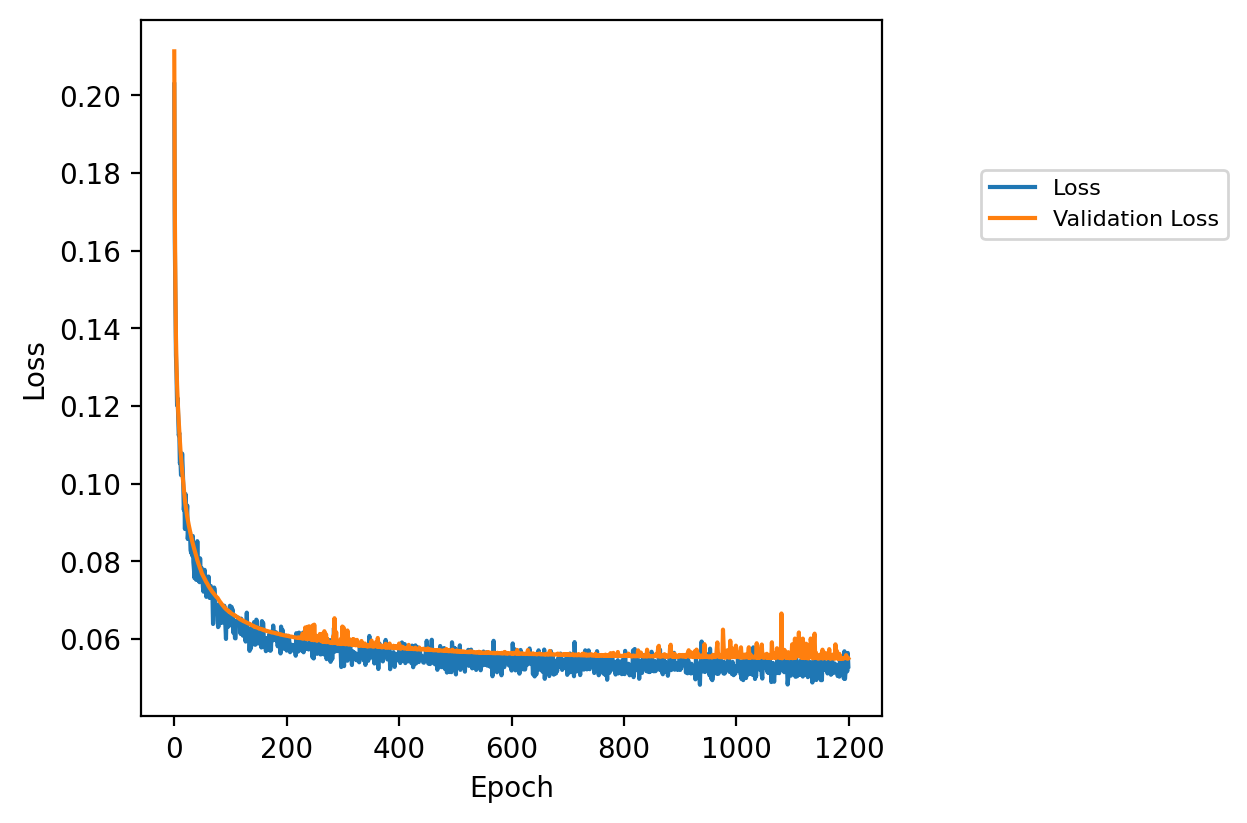

In [9]:
fig,ax1 = plt.subplots(1, dpi=200,constrained_layout=True)
plt.ylim()

ax1.plot(history["Loss"],label="Loss")
ax1.plot(history["Val Loss"],label="Validation Loss")
ax1.set(xlabel='Epoch',
       ylabel='Loss')

chartBox = ax1.get_position()
ax1.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), shadow=False, ncol=1,fontsize=8)


In [21]:
x_reconstructed, mu, log_var,z,last_layer=model_two.call(adata.X)
z=np.asarray(z)
    
latent_sp=pd.DataFrame(z,columns=paths_ext)
latent_sp.index=adata.obs_names


In [22]:
paths=list(adata.uns['terms'])
if 4>1:
    paths_ext=[]
    for i in range(len(paths)):
        for j in range(4):
            paths_ext.append(paths[i]+"_"+str(j))

    for i in range(4*1):
        paths_ext.append("auxiliary_"+str(i))
else:
    paths_ext=paths
    for i in range(4*1):
        paths_ext.append("auxiliary_"+str(i))

adata.obsm["Latent_sp"]=latent_sp
latent_sp=pd.DataFrame(z,columns=paths_ext)
latent_sp.index=adata.obs_names
adata.obsm["Latent_sp"]=latent_sp

In [24]:
adata.write("/cluster/work/grlab/projects/projects2020-autoencoder_pathway/gamma_VAE/kang_2018/Kang_test_run.h5ad")